In [466]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

import warnings;
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [467]:
df_movies = pd.read_csv('movies.csv')
df_ratings = pd.read_csv('ratings.csv')

In [468]:
movies = df_movies
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [469]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [470]:
ratings = df_ratings.groupby('movieId', as_index=False)['rating'].mean()
merged_df = pd.merge(movies, ratings, how='outer')
merged_df.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


<AxesSubplot:>

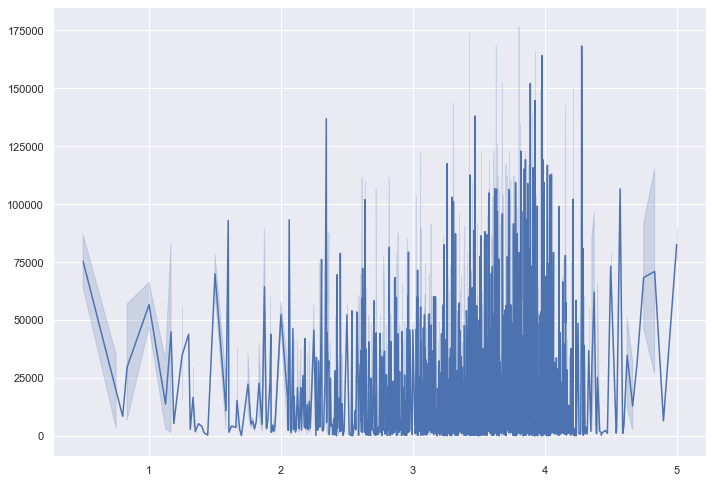

In [471]:
sns.lineplot(x=ratings.rating.values, y=ratings.movieId.values)

<AxesSubplot:ylabel='count'>

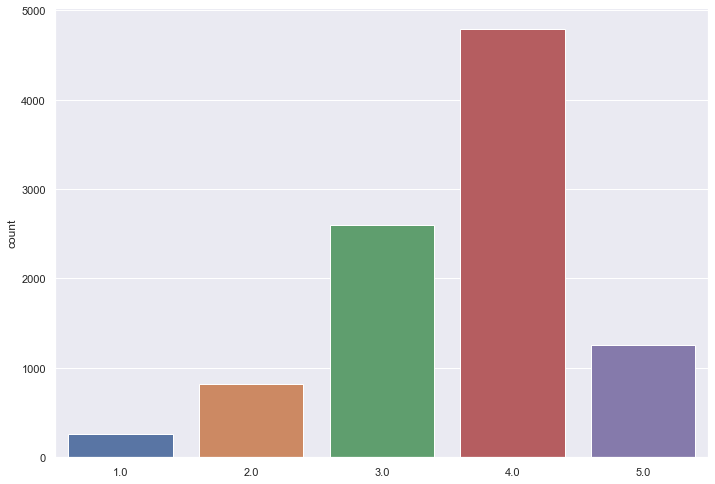

In [472]:
ratings_ = ratings
ratings_['rating'] = np.ceil(ratings_.rating.values)
sns.countplot(x=ratings_.rating.values)

In [473]:
genres = df_movies['genres'].apply(lambda x: (x.split("|"))).to_list()
result = {x for l in genres for x in l}
result = dict.fromkeys(result, 0)
for genre in genres:
    for g in genre:
        result[g]+=1
print(result)

{'Comedy': 3756, 'Drama': 4361, 'Documentary': 440, 'IMAX': 158, 'Adventure': 1263, '(no genres listed)': 34, 'Film-Noir': 87, 'Action': 1828, 'Animation': 611, 'Musical': 334, 'Romance': 1596, 'Horror': 978, 'Sci-Fi': 980, 'Children': 664, 'Western': 167, 'War': 382, 'Crime': 1199, 'Fantasy': 779, 'Thriller': 1894, 'Mystery': 573}


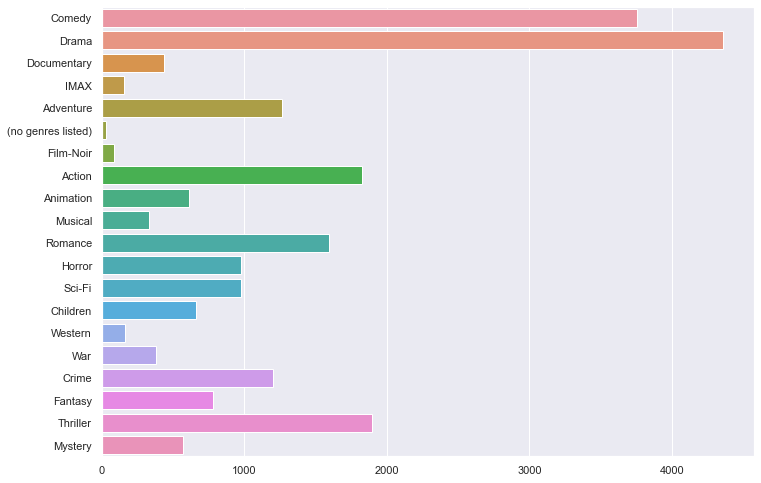

In [474]:
ax = sns.barplot(y=list(result.keys()), x=list(result.values()))

In [475]:
genres_set = list({x for l in genres for x in l})
def extractDigits(lst):
    return list(map(lambda el:[el], lst))
genres_set = extractDigits(genres_set)
for i in genres_set:
    i.append(0)
    i.append(0)    
merged_df['genres'] = merged_df['genres'].apply(lambda x: (x.split("|"))).to_list()
merged_df.dropna(inplace=True)
merged_df.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3.920930
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",3.431818
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",3.259615
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",2.357143
4,5,Father of the Bride Part II (1995),[Comedy],3.071429


In [476]:
for row, rating in zip(merged_df.genres, merged_df.rating):
    for genre in row:
        for g in range(len(genres_set)):
            if genres_set[g][0] == genre:
                try:
                    genres_set[g][1]+=round(rating,2)
                    genres_set[g][2]+=1
                except:
                    pass        

[3.1816919797495338, 3.4209565417337298, 3.7817579908675802, 3.3119620253164563, 3.2152852614897, 3.371176470588235, 3.67035294117647, 3.0945240700218837, 3.497229508196722, 3.296306306306305, 3.364934003771219, 2.9190071647901754, 3.102632653061225, 3.107831325301206, 3.3835928143712577, 3.5716535433070873, 3.301856187290969, 3.218676092544986, 3.1561461090524126, 3.3304013961605587]
['Comedy', 'Drama', 'Documentary', 'IMAX', 'Adventure', '(no genres listed)', 'Film-Noir', 'Action', 'Animation', 'Musical', 'Romance', 'Horror', 'Sci-Fi', 'Children', 'Western', 'War', 'Crime', 'Fantasy', 'Thriller', 'Mystery']


<AxesSubplot:>

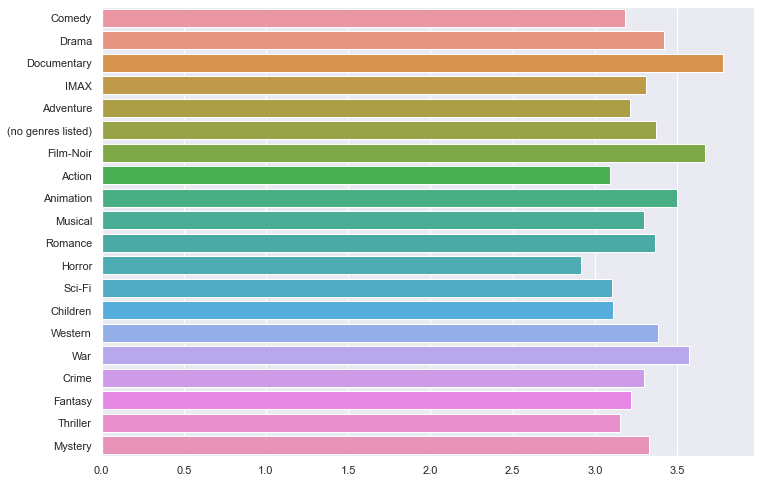

In [477]:
ratings_per_genre = []
genres
for i in genres_set:
    ratings_per_genre.append(i[1]/i[2])
genres = list({x for l in genres for x in l})
sns.barplot(x=ratings_per_genre, y=genres)

In [427]:
df = pd.merge(df_movies,df_ratings)

In [302]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,847434962
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,1106635946
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5,1510577970
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5,1305696483


In [275]:
df.shape

(100836, 6)

In [159]:
df.dropna(inplace=True)

In [160]:
df['movieId']= df['movieId'].astype(str)

In [161]:
users = df["userId"].unique().tolist()
len(users)

610

In [162]:
random.shuffle(users)

# extract 90% of user ID's
users_train = [users[i] for i in range(round(0.9*len(users)))]

# split data into train and validation set
train_df = df[df['userId'].isin(users_train)]
validation_df = df[~df['userId'].isin(users_train)]

In [163]:
#list to capture watch history of the users
watch_train = []

# populate the list with the movie ID
for i in tqdm(users_train):
    temp = train_df[train_df["userId"] == i]["movieId"].tolist()
    watch_train.append(temp)

100%|██████████████████████████████████████████████████████████████████████████████| 549/549 [00:00<00:00, 1992.99it/s]


In [164]:
# train word2vec model
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, 
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)
model.build_vocab(watch_train, progress_per=200)

model.train(watch_train, total_examples = model.corpus_count, 
            epochs=200, report_delay=1)

(16094203, 18189200)

In [165]:
watch = train_df[["movieId", "title"]]

# remove duplicates
watch.drop_duplicates(inplace=True, subset='movieId', keep="last")

# create movie id and tittle dictionary
watch_dict = watch.groupby('movieId')['title'].apply(list).to_dict()

In [166]:
def similar_watch(v, n = 6):
    
    # extract most similar movies for the input vector
    ms = model.wv.similar_by_vector(v, topn= n+1)[1:]
    
    # extract name and similarity score of the similar movies
    new_ms = []
    for j in ms:
        pair = (watch_dict[j[0]][0], j[1])
        new_ms.append(pair)
        
    return new_ms        

In [167]:
def movie_recommendations(n):
    print(watch_dict[str(n)])
    for i in similar_watch(model.wv[str(n)]):
        print(i)

In [168]:
movie_recommendations(100)

['City Hall (1996)']
('Mary Reilly (1996)', 0.7007748484611511)
('Broken Arrow (1996)', 0.6569328904151917)
('Screamers (1995)', 0.6506565809249878)
('Juror, The (1996)', 0.6465120911598206)
("Mr. Holland's Opus (1995)", 0.6395196318626404)
('Hate (Haine, La) (1995)', 0.6231657862663269)


In [169]:
movie_recommendations(50)

['Usual Suspects, The (1995)']
('Apollo 13 (1995)', 0.6781266331672668)
('Braveheart (1995)', 0.6713377833366394)
('Hate (Haine, La) (1995)', 0.6693094968795776)
('From Dusk Till Dawn (1996)', 0.6651598811149597)
('Twelve Monkeys (a.k.a. 12 Monkeys) (1995)', 0.6622980237007141)
('Batman Forever (1995)', 0.6534320712089539)


# Clustering

In [478]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [479]:
final_dataset = df_ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [480]:
no_user_voted = df_ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = df_ratings.groupby('userId')['rating'].agg('count')

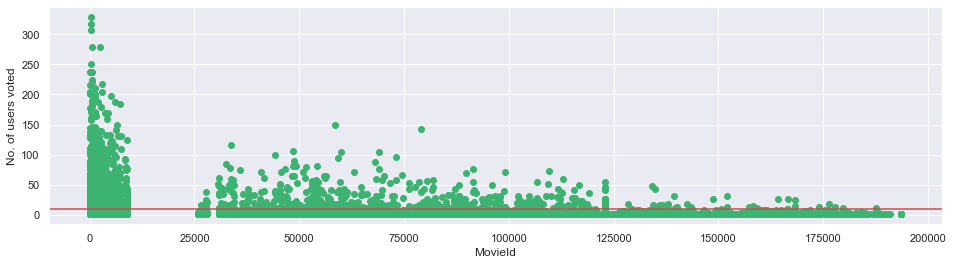

In [481]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [482]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

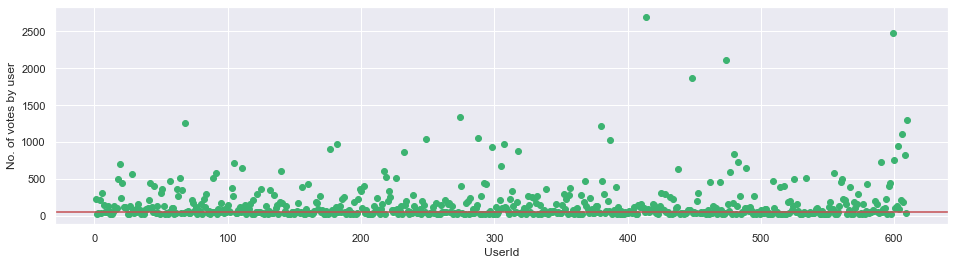

In [483]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [484]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 20].index]
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [485]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [486]:
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [487]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [488]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [489]:
def get_movie_recommendation(movie_name, n_movies_to_reccomend = 5):
    movie_list = df_movies[df_movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),\
                               key=lambda x: x[1])[:0:-1]
        
        recommend_frame = []
        
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = df_movies[df_movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':df_movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    
    else:
        
        return "No movies found. Please check your input"

In [490]:
get_movie_recommendation('Iron Man', 5)

,Title,Distance
1,Avatar (2009),0.380061
2,Iron Man 2 (2010),0.354419
3,"Avengers, The (2012)",0.337635
4,WALL·E (2008),0.328485
5,"Dark Knight, The (2008)",0.322625


In [491]:
get_movie_recommendation('Toy Story', 5)

,Title,Distance
1,Forrest Gump (1994),0.451747
2,Star Wars: Episode IV - A New Hope (1977),0.442612
3,Independence Day (a.k.a. ID4) (1996),0.433992
4,Jurassic Park (1993),0.433073
5,Toy Story 2 (1999),0.427399
